# Chapter 8

In [1]:
library(randomForest)
library(ISLR)
library(MASS)
library(tree)
library(gbm)
library(glmnet)
#install.packages("Rfast", repos='http://cran.us.r-project.org')

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.
Warning message:
"package 'ISLR' was built under R version 3.6.3"Warning message:
"package 'tree' was built under R version 3.6.3"Warning message:
"package 'gbm' was built under R version 3.6.3"Loaded gbm 2.1.8
Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



In [2]:
chose_lambda=function(df_train, df_test, y, formula, lambda){
set.seed(1)
error=rep(NA, length(lambda))
for(i in 1:length(lambda)){
    boost.fit<-gbm(formula, data=df_train, distribution="gaussian", n.trees=1000, interaction.depth=4, shrinkage = lambda[i])
    pred <- predict(boost.fit, df_test, n.trees=1000)
    error[i] = mean((pred-y)^2)
}
    return(error)
}    
Predictions<-function(y_probs, y, l1, l2, length, threshold=0.5){
    y_pred = rep(l1, length)
    y_pred[y_probs>threshold]=l2
    #confusion matrix
    cm=table(y_pred, y)
    return(cm)
    }
true_pos<-function(cm){
    return(cm[4]/(cm(4)+cm[3]))
}

## Problem 2

It is mentioned in Section 8.2.3 that boosting using depth-one trees
(or stumps) leads to an additive model.
Explain why this is the case. You can begin with (8.12) in
Algorithm 8.2.

If number of splits d =1 we have singl varible in functions in Eq.(12.8) and it is the same as additive models. 

## Problem3

Consider the Gini index, classification error, and entropy in a simple classification setting with two classes. Create a single plot
that displays each of these quantities as a function of $\hat{p}_{m1}$. The x-axis should display $\hat{p}_{m1}$, ranging from 0 to 1, and the y-axis should
display the value of the Gini index, classification error, and entropy

p=$\hat{p}_{m1}$, then $\hat{p}_{m2}$=1-p

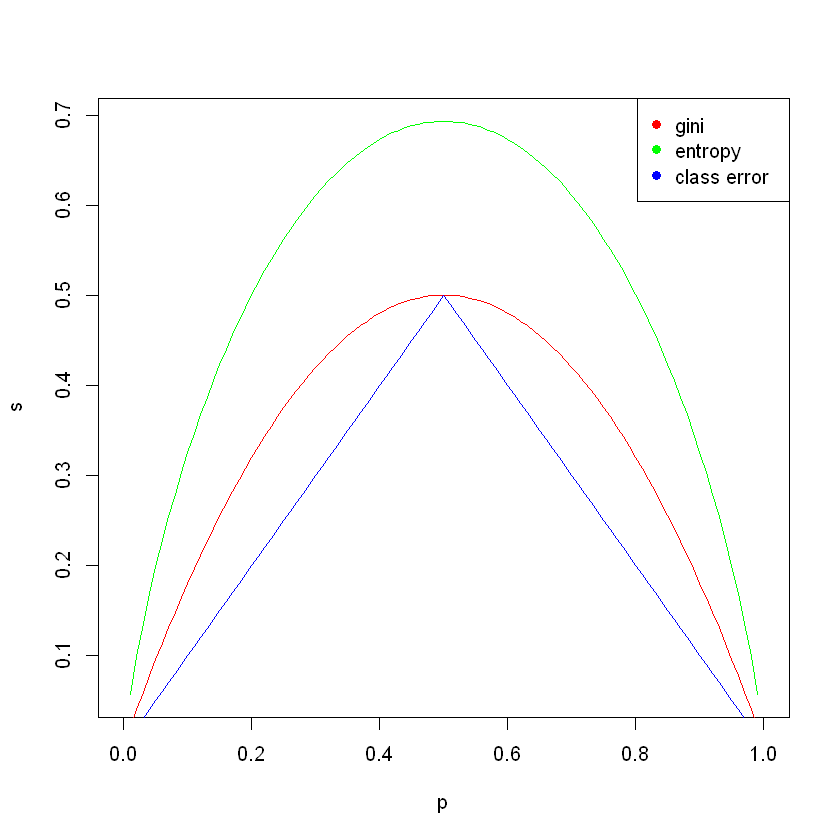

In [3]:
p=seq(0,1,0.01)
#entropy
s=-log(p)*p-(1-p)*log(1-p)
#error
E=1-pmax(p, 1-p)
#gini
g=2*p*(1-p)

plot(p, s, type = "l", col = "green")
lines(p, g, type = "l", col = "red")
lines(p, E, type = "l", col = "blue")
legend("topright",legend=c("gini","entropy", "class error"),pch=19,col=c("red", "green", "blue"))

## Problem 6

Provide a detailed explanation of the algorithm that is used to fit a
regression tree.

We do binary tree splitting on conditions. As the rsult we divide the predictor space (set of possible p features $X_i$ values) into J distinct non-overlapping regions $R_j$.
For every observation that falls in $R_j$ we make the same prediction that is the mean of the response values for the training observations in R_j

Grow tree until each terminal node has few observations than some minimum number.

Apply pruning to obtain a sequence of best subtrees as function of parameter alpha.

Chose alpha to minimize average Kfold crossvalidation error.

## Problem 7

In the lab, we applied random forests to the Boston data using mtry=6
and using ntree=25 and ntree=500. Create a plot displaying the test
error resulting from random forests on this data set for a more comprehensive range of values for mtry and ntree. You can model your
plot after Figure 8.10. Describe the results obtained.

In [4]:
head(Boston)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [5]:
test = sample (1:nrow(Boston), nrow(Boston)/3)

In [6]:
set.seed(1)
num_trees=500
mtr=c(3, 6, 13)
trees=rep(NA, num_trees/25)
error=rep(NA, num_trees/25)
errors<-matrix(list(), nrow=20, ncol=3)
for(j in 1:3){
for(i in seq(1, num_trees/25)){
    rf.boston= randomForest( medv∼.,data=Boston[-test,],
    mtry=mtr[j], ntree = 1+(i-1)*25, importance =TRUE)
    yhat.bag = predict (rf.boston , newdata=Boston[test,])
    error[i]=mean((yhat.bag-Boston$medv[test])^2)
    } 
errors[1:20, j] = error
}


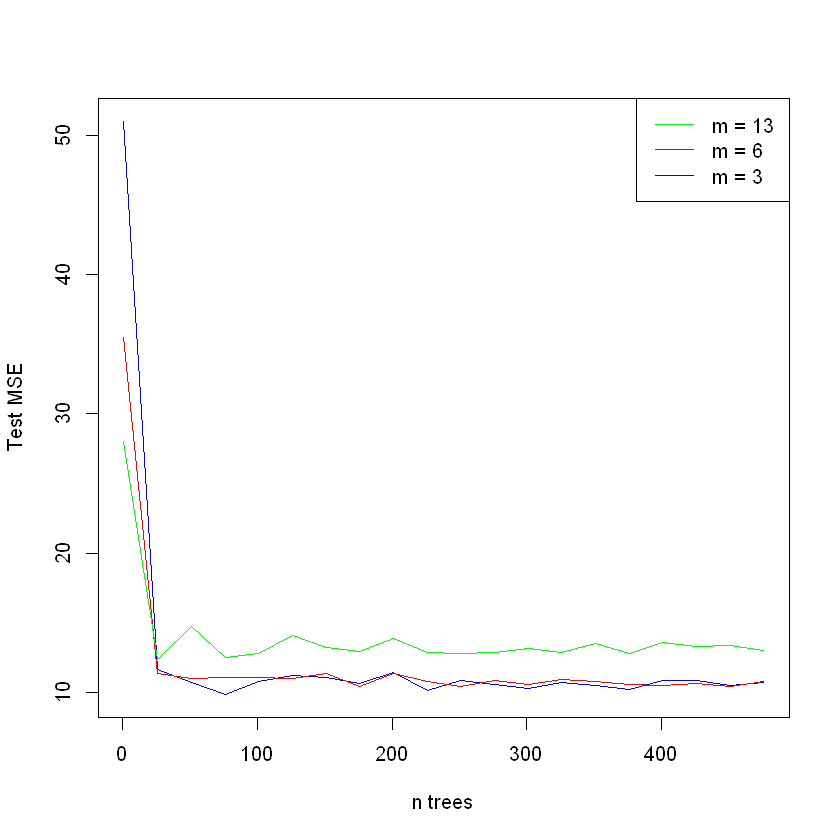

In [7]:
plot(seq(1, num_trees, by = 25), errors[1:20, 1], xlab = 'n trees', ylab = 'Test MSE', type = 'l', col="blue")
lines(seq(1, num_trees, by = 25), errors[1:20, 2], col="red")
lines(seq(1, num_trees, by = 25), errors[1:20, 3], col="green")
legend("topright", c("m = 13", "m = 6", "m = 3"), col = c("green", "red", "blue"), cex = 1, lty = 1)

## Problem 8

In the lab, a classification tree was applied to the Carseats data set after converting Sales into a qualitative response variable. Now we will
seek to predict Sales using regression trees and related approaches,
treating the response as a quantitative variable.


(a) Split the data set into a training set and a test set.

In [8]:
head(Carseats)

Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
11.22,111,48,16,260,83,Good,65,10,Yes,Yes
10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4.15,141,64,3,340,128,Bad,38,13,Yes,No
10.81,124,113,13,501,72,Bad,78,16,No,Yes


In [9]:
test = sample (1:nrow(Carseats), nrow(Carseats)/3)
Carseats.train = Carseats[-test,]
Carseats.test = Carseats[test,]

Fit a regression tree to the training set. Plot the tree, and interpret the results. What test MSE do you obtain?

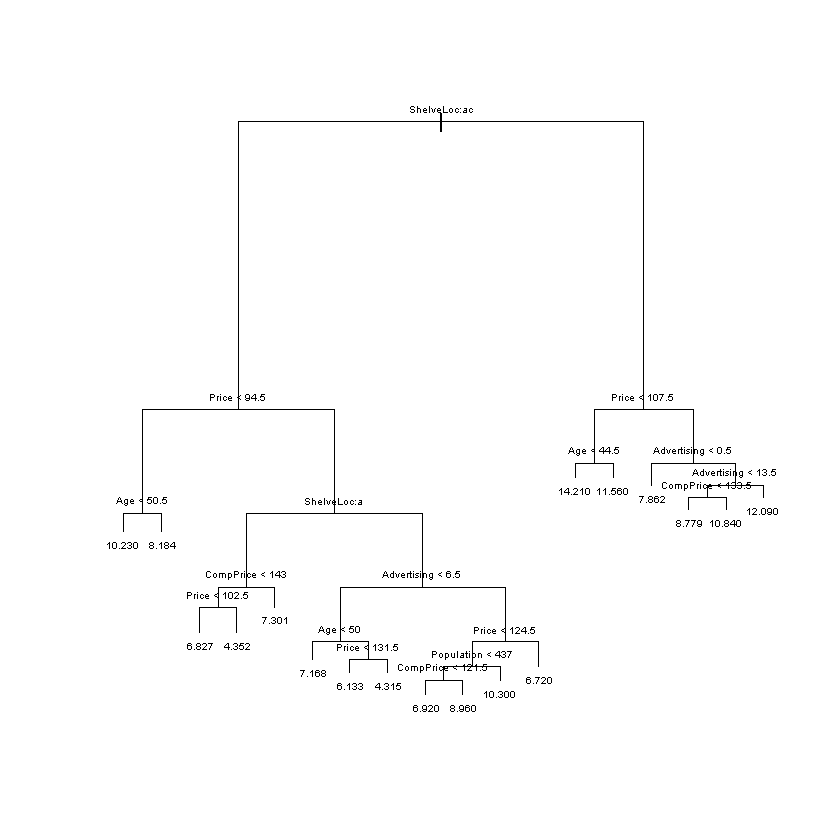

In [10]:
tree.carseats = tree(Sales∼., Carseats.train)
tree.pred=predict(tree.carseats, Carseats.test)
plot(tree.carseats)
text(tree.carseats, cex=.5)

In [11]:
mean((tree.pred-Carseats$Sales[test])^2)

[1] 4.29285

(c) Use cross-validation in order to determine the optimal level of
tree complexity. Does pruning the tree improve the test MSE?

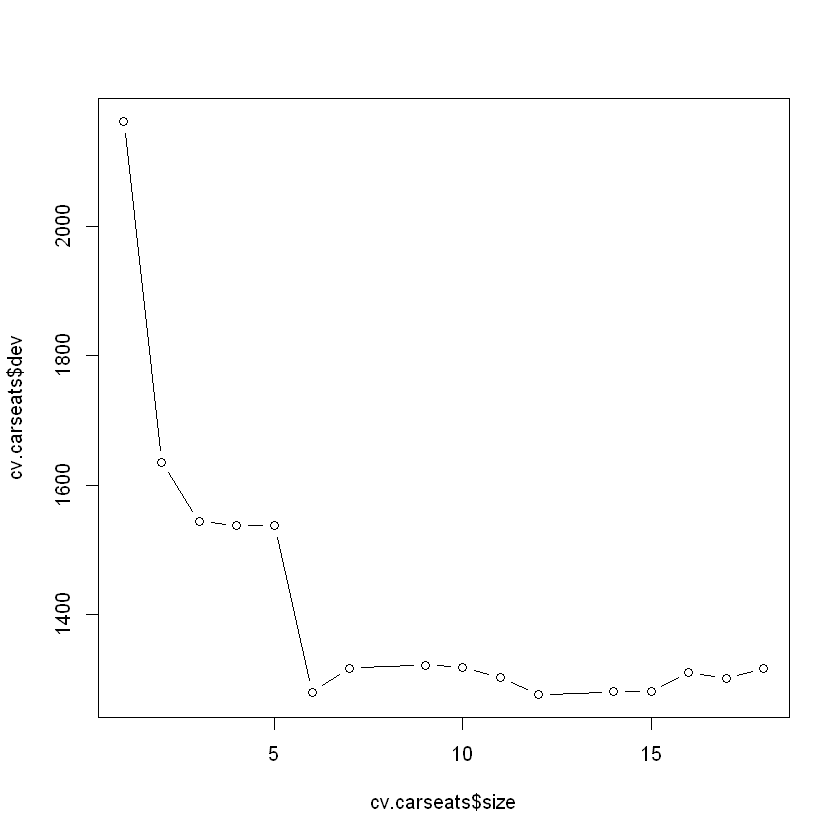

In [12]:
cv.carseats=cv.tree(tree.carseats)
plot(cv.carseats$size ,cv.carseats$dev ,type='b')

From plot above size 13, 15 must have minimum error on cv. 

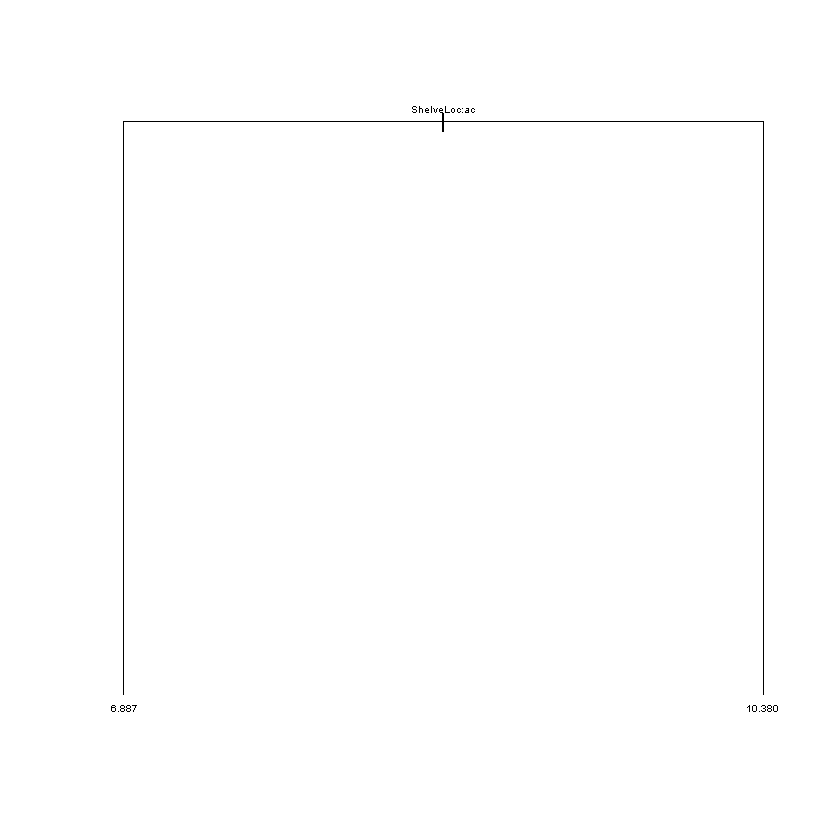

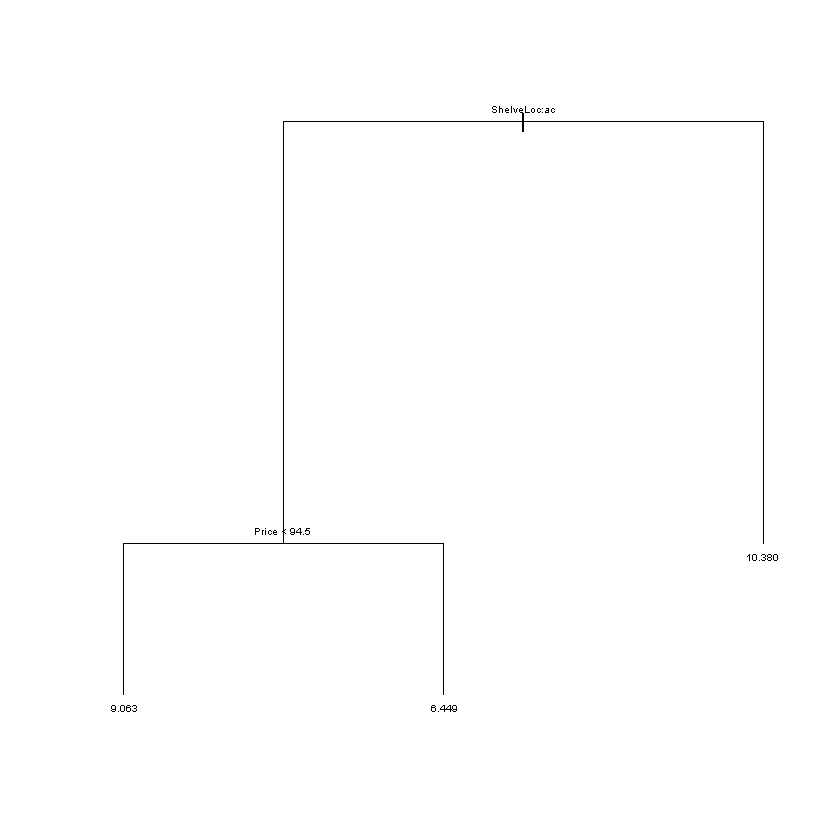

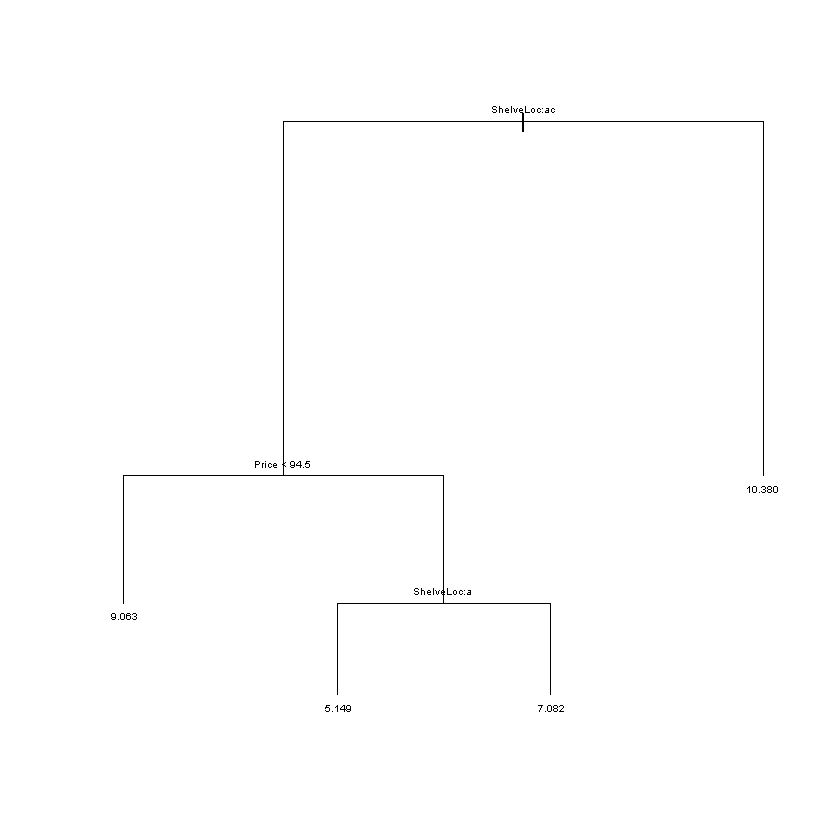

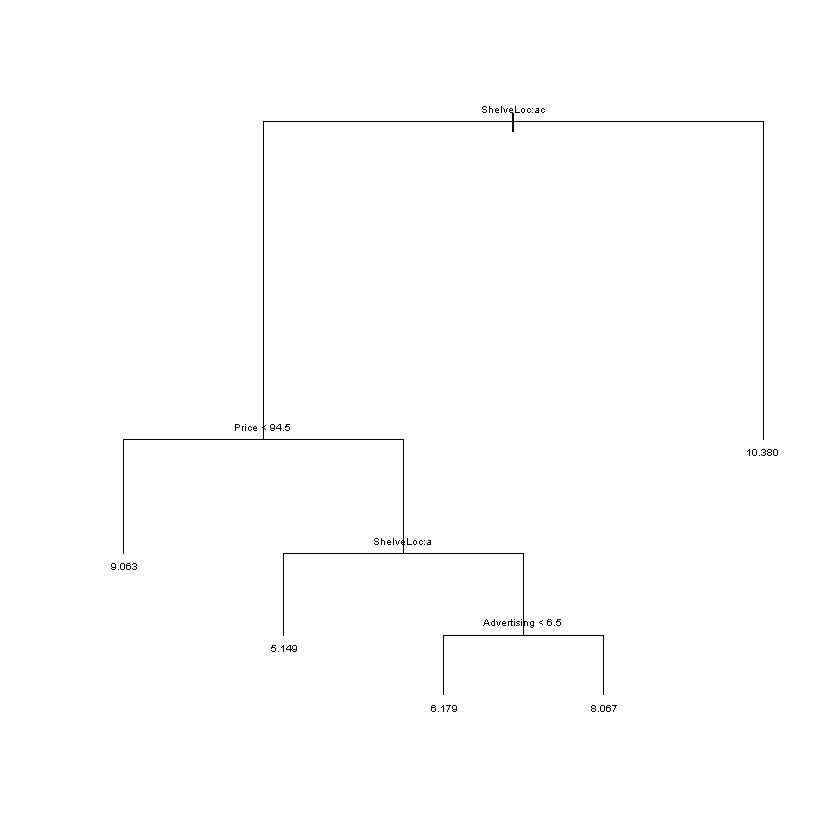

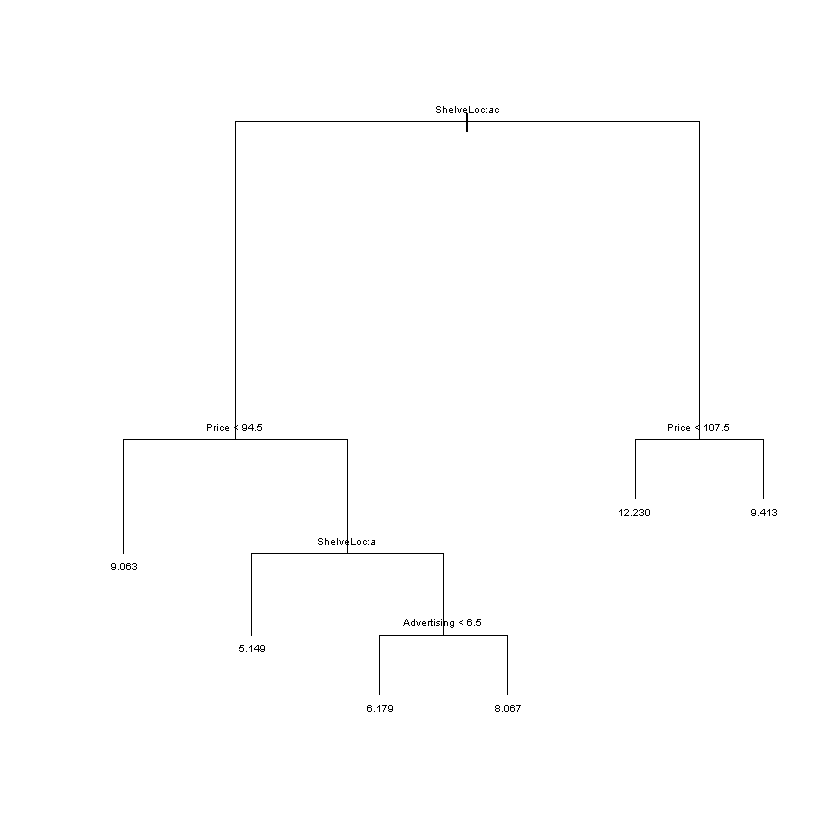

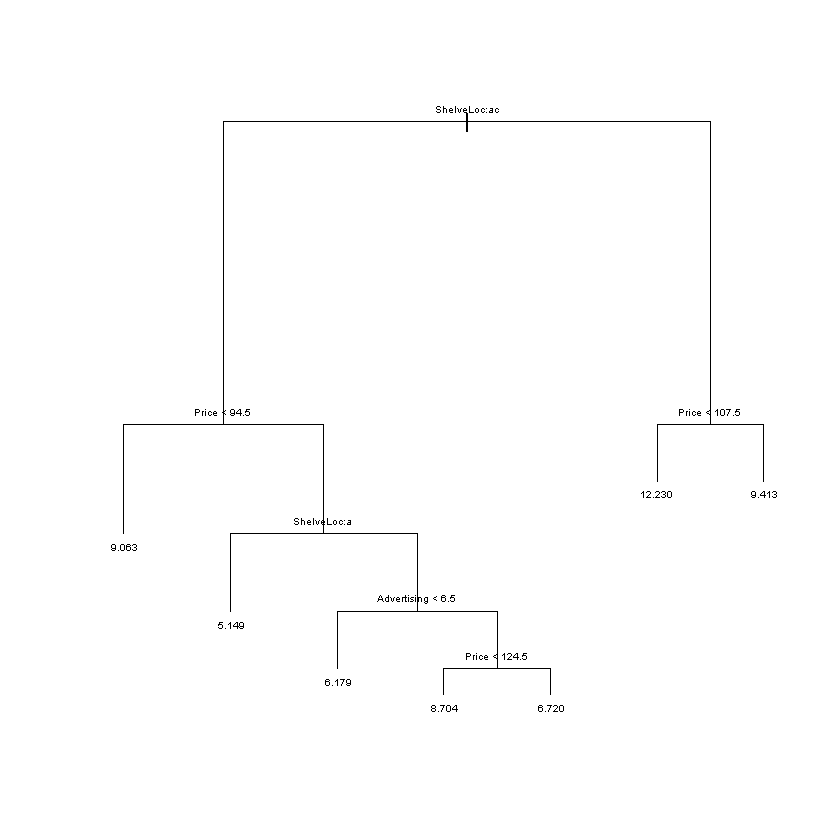

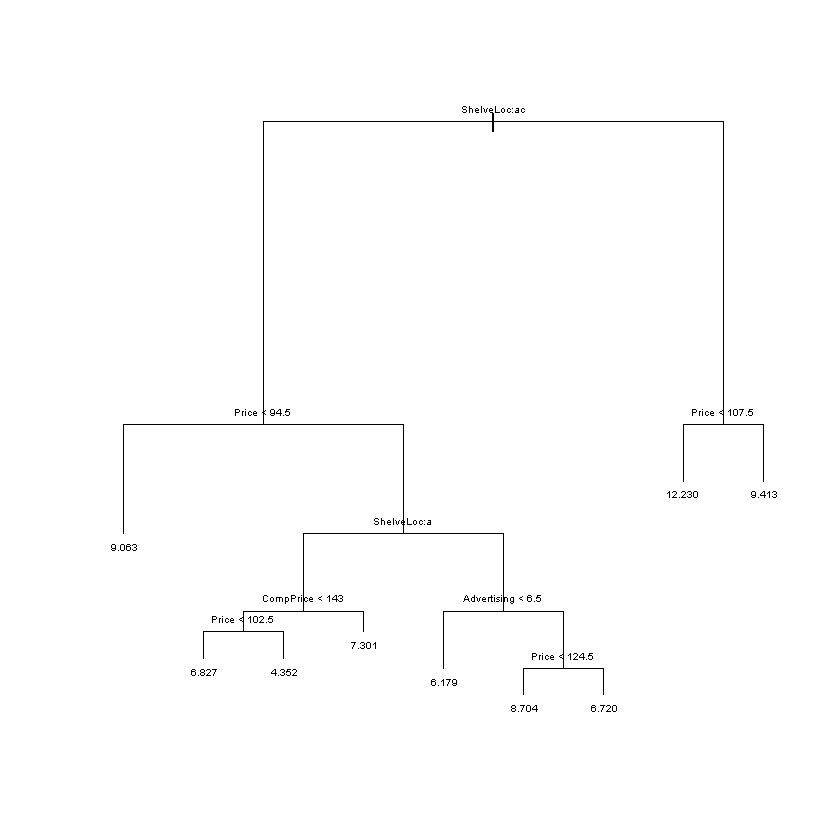

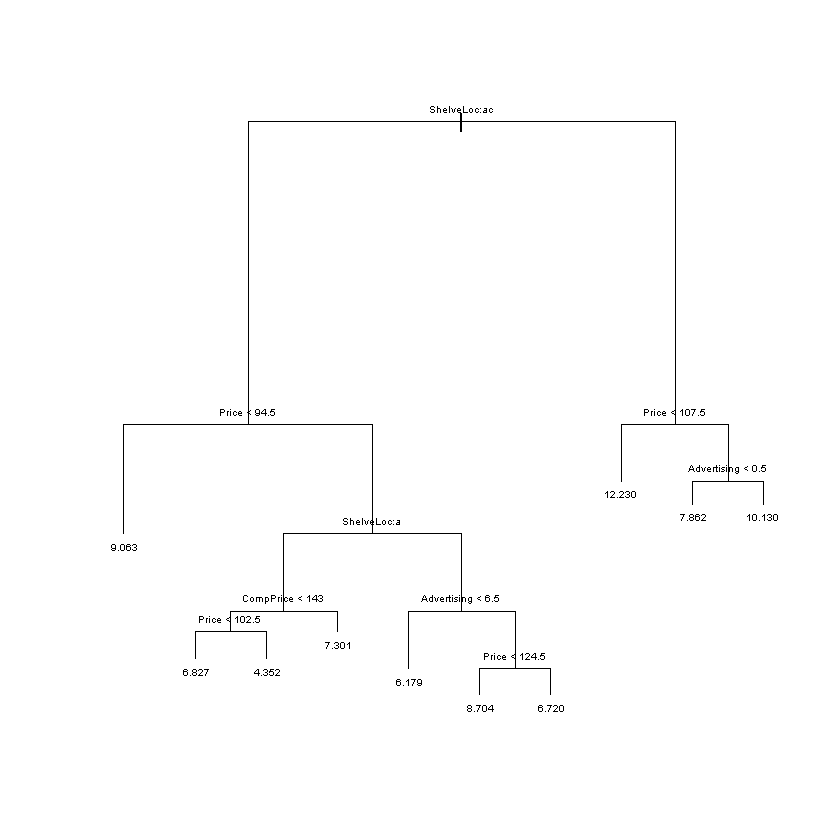

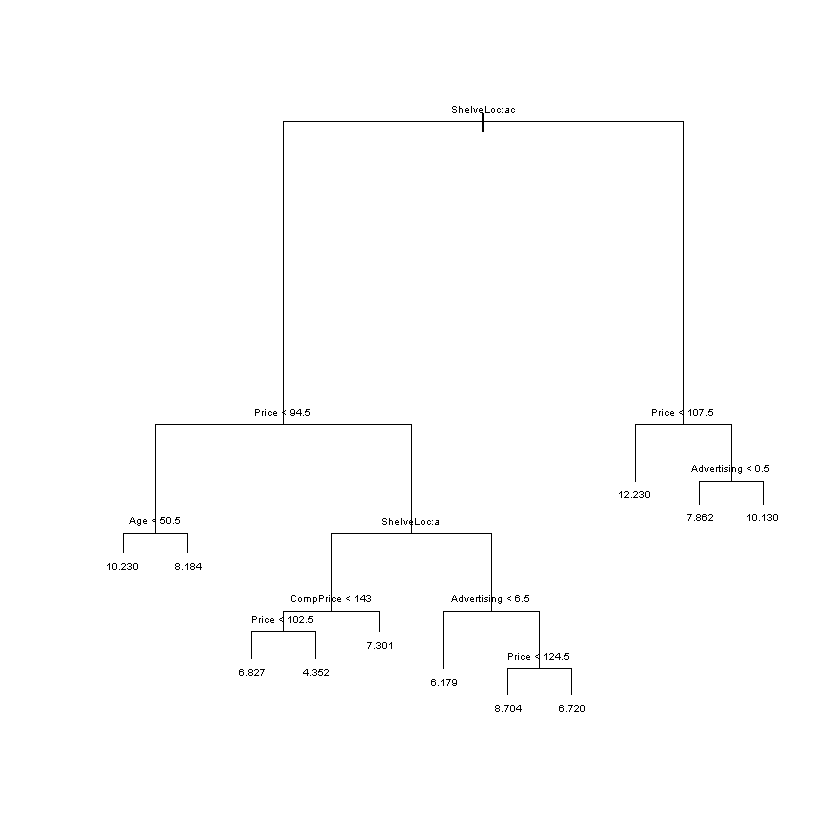

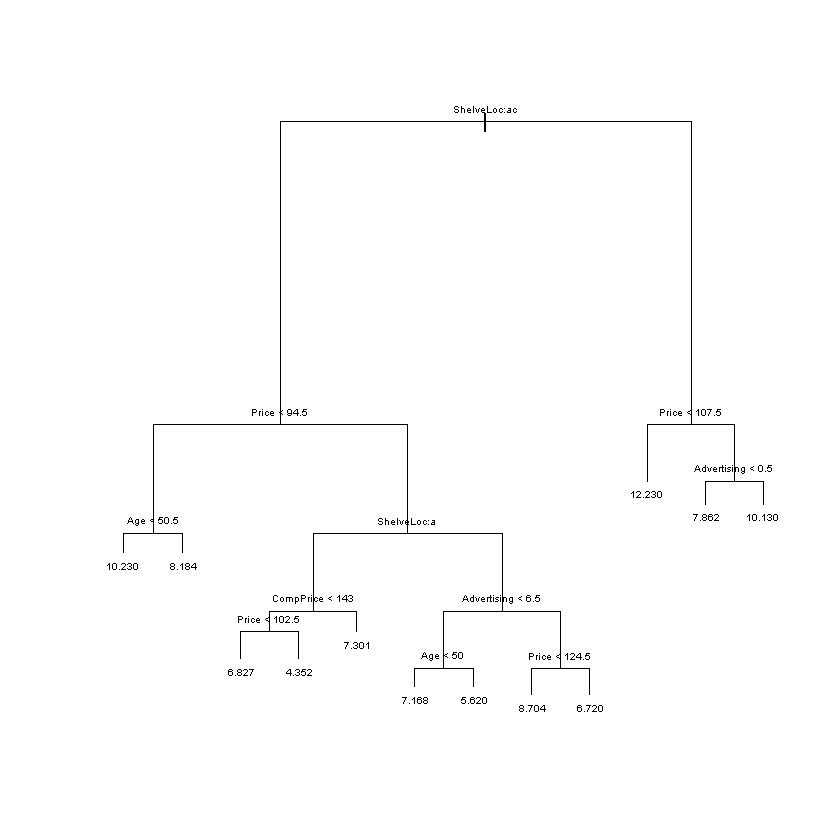

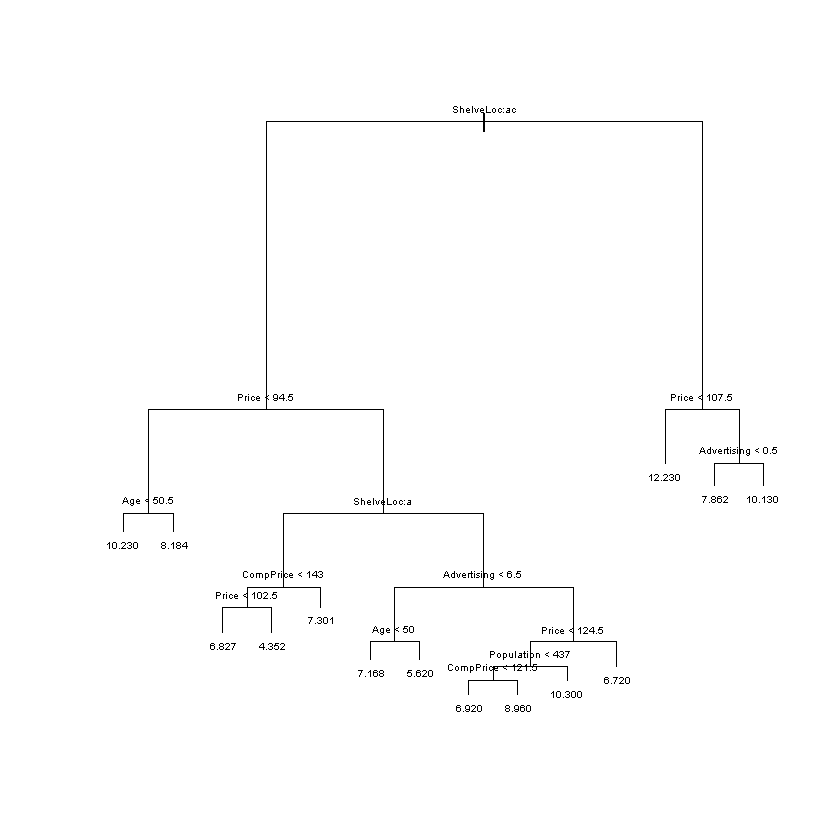

In [13]:
n=14
num=rep(NA, n)
error = rep(NA, n)
for(i in 2:n){
    prune.carseats=prune.tree(tree.carseats,best=i)
    prune.pred=predict(prune.carseats, Carseats.test)
    plot(prune.carseats)
    text(prune.carseats, cex=.5)
    error[i]=mean((prune.pred-Carseats$Sales[test])^2)
    }

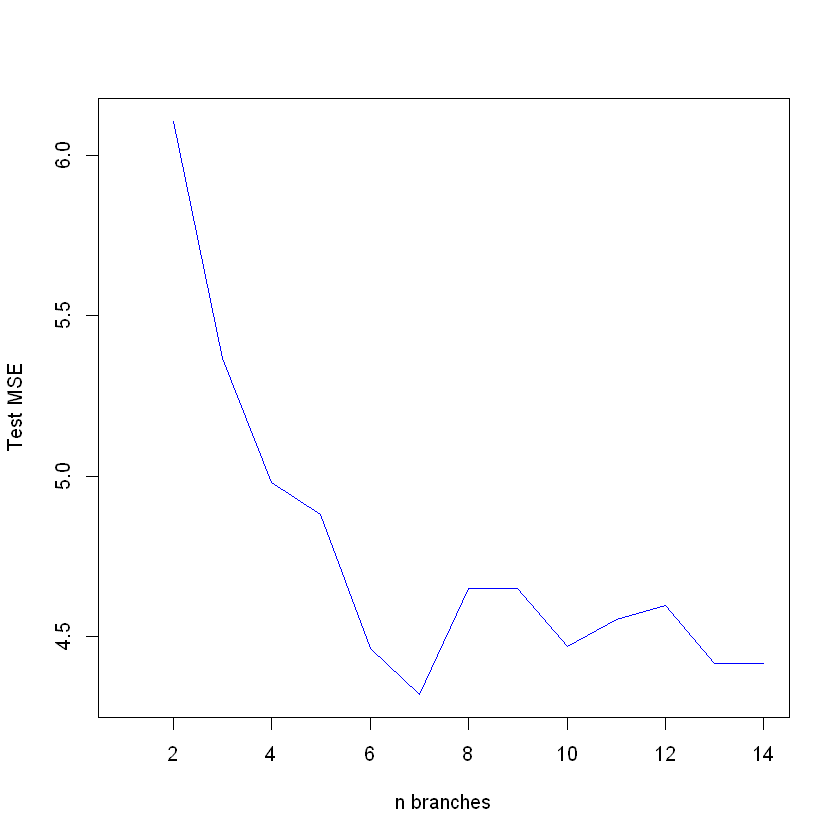

In [14]:
plot(1:n, error,  xlab = 'n branches', ylab = 'Test MSE', type = 'l', col="blue")

For test the best number branches is 9.

[1] 4.414336

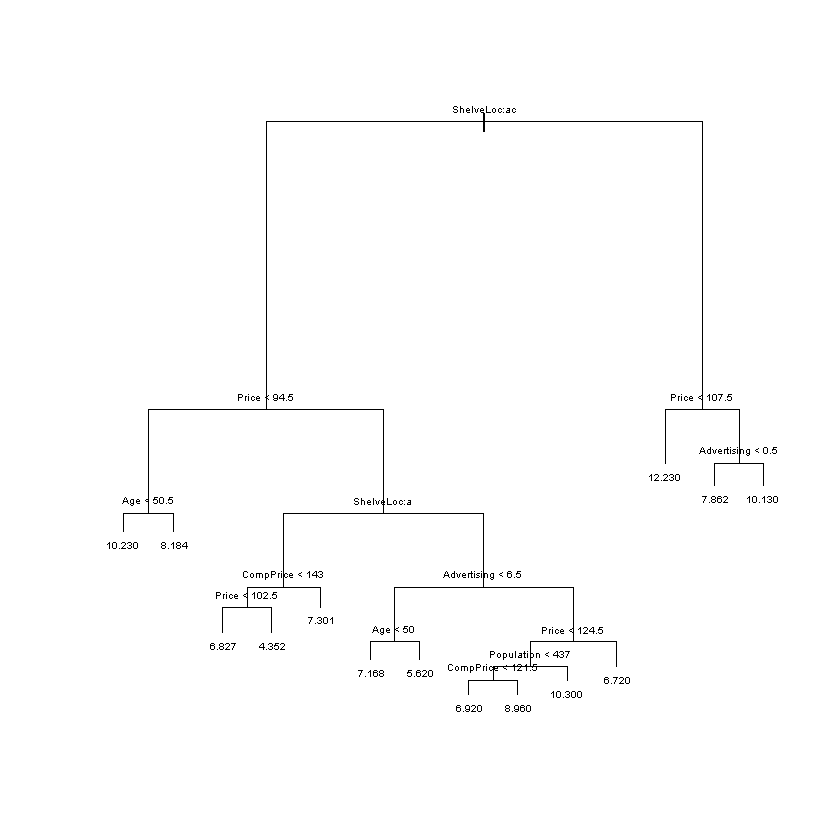

In [15]:
prune.carseats=prune.tree(tree.carseats,best=14)
prune.pred=predict(prune.carseats, Carseats.test)
plot(prune.carseats)
text(prune.carseats, cex=.5)
mean((prune.pred-Carseats$Sales[test])^2)

(d) Use the bagging approach in order to analyze this data. What
test MSE do you obtain? Use the importance() function to determine which variables are most important.

In [16]:
set.seed(1)
bag.carseats= randomForest(Sales∼.,data=Carseats.train, mtry=10, importance =TRUE)
bag.carseats


Call:
 randomForest(formula = Sales ~ ., data = Carseats.train, mtry = 10,      importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 10

          Mean of squared residuals: 2.555303
                    % Var explained: 68.05

In [17]:
pred.carseats = predict(bag.carseats, newdata = Carseats.test)
mean((pred.carseats - Carseats$Sales[test])^2)

[1] 2.428318

MSE is improved

In [18]:
importance (bag.carseats)

,%IncMSE,IncNodePurity
CompPrice,30.3196220,235.36950
Income,9.6673991,109.34479
Advertising,19.8052037,173.51016
Population,-1.9603944,69.87557
Price,59.7236446,544.70957
ShelveLoc,69.8782053,657.12044
Age,23.0185673,220.79394
Education,-0.1287107,56.34475
Urban,-2.3300945,6.53449
US,4.2364571,14.49869


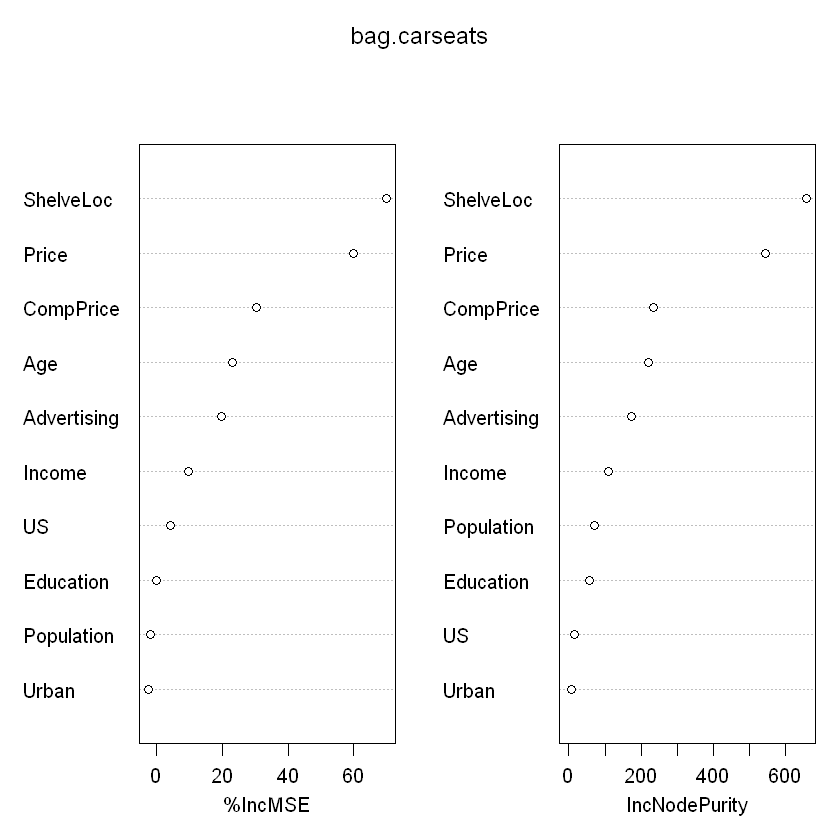

In [19]:
varImpPlot(bag.carseats)

(e) Use random forests to analyze this data. What test MSE do you
obtain? Use the importance() function to determine which variables are most important. Describe the effect of m, the number of
variables considered at each split, on the error rate
obtained.

In [20]:
set.seed(1)
n=10
error=rep(NA, n)
for (i in 1:10){
rf.carseats= randomForest(Sales∼.,data=Carseats.train, mtry=i, importance =TRUE)
rf.carseats
pred.carseats = predict(rf.carseats, newdata = Carseats.test)
error[i]=mean((pred.carseats - Carseats$Sales[test])^2)
}

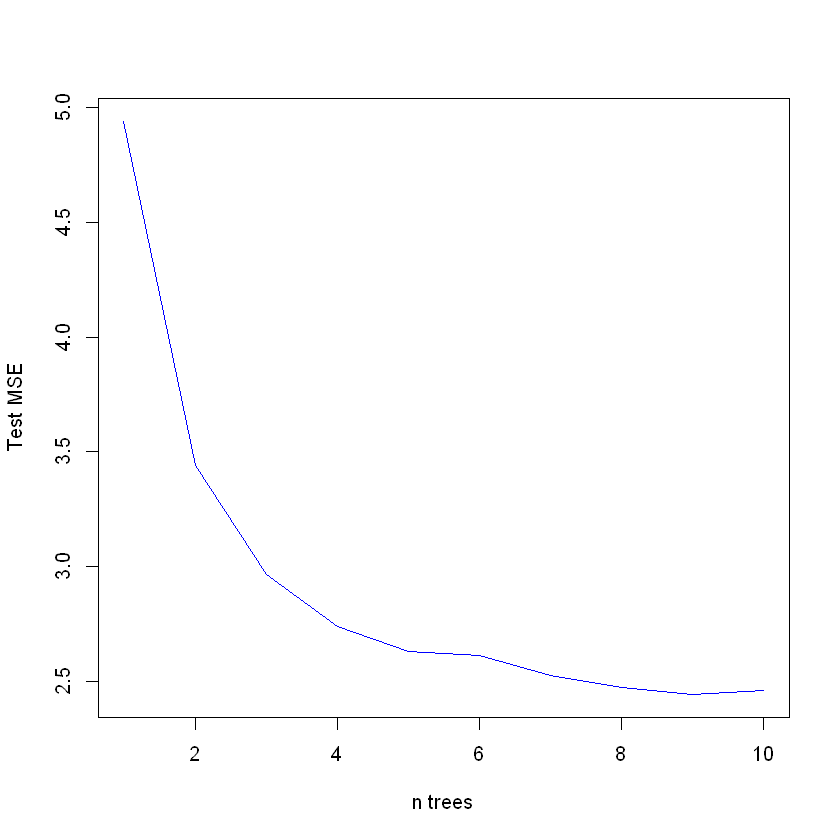

In [21]:
plot(1:n, error,  xlab = 'n trees', ylab = 'Test MSE', type = 'l', col="blue")

In [22]:
min(error)

[1] 2.442895

## Problem 9

In [23]:
head(OJ)

Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
CH,230,7,1.69,1.99,0.00,0.0,0,1,0.965228,1.99,1.69,0.30,Yes,0.000000,0.000000,0.30,0


(a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

In [24]:
train = sample (1:nrow(OJ), 800)
OJ.train = OJ[train,]
OJ.test = OJ[-train,]

(b) Fit a tree to the training data, with Purchase as the response
and the other variables as predictors. Use the summary() function
to produce summary statistics about the tree, and describe the
results obtained. What is the training error rate? How many
terminal nodes does the tree have?

In [25]:
tree.OJ = tree(Purchase∼., OJ.train)
summary(tree.OJ)


Classification tree:
tree(formula = Purchase ~ ., data = OJ.train)
Variables actually used in tree construction:
[1] "LoyalCH"   "DiscCH"    "PriceDiff"
Number of terminal nodes:  6 
Residual mean deviance:  0.7778 = 617.6 / 794 
Misclassification error rate: 0.1662 = 133 / 800 

(c) Type in the name of the tree object in order to get a detailed
text output. Pick one of the terminal nodes, and interpret the
information displayed.

In [26]:
tree.OJ

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 800 1077.00 CH ( 0.60000 0.40000 )  
   2) LoyalCH < 0.48285 311  334.10 MM ( 0.22830 0.77170 )  
     4) DiscCH < 0.335 302  306.60 MM ( 0.20530 0.79470 )  
       8) LoyalCH < 0.0356415 57   10.07 MM ( 0.01754 0.98246 ) *
       9) LoyalCH > 0.0356415 245  275.00 MM ( 0.24898 0.75102 ) *
     5) DiscCH > 0.335 9    0.00 CH ( 1.00000 0.00000 ) *
   3) LoyalCH > 0.48285 489  435.80 CH ( 0.83640 0.16360 )  
     6) LoyalCH < 0.764572 232  284.10 CH ( 0.69828 0.30172 )  
      12) PriceDiff < 0.065 79  108.50 MM ( 0.44304 0.55696 ) *
      13) PriceDiff > 0.065 153  139.50 CH ( 0.83007 0.16993 ) *
     7) LoyalCH > 0.764572 257   84.54 CH ( 0.96109 0.03891 ) *

Node 4. The split criterion is Customer brand loyalty for CH juice < 0.276142, number of observations is 171. It is a terminal node because of the asterisk. The deviance is 127.4. About 12% of the observations in that branch take the value of CH, and the remaining 87.7% take the value of MM.



(d) Create a plot of the tree, and interpret the results

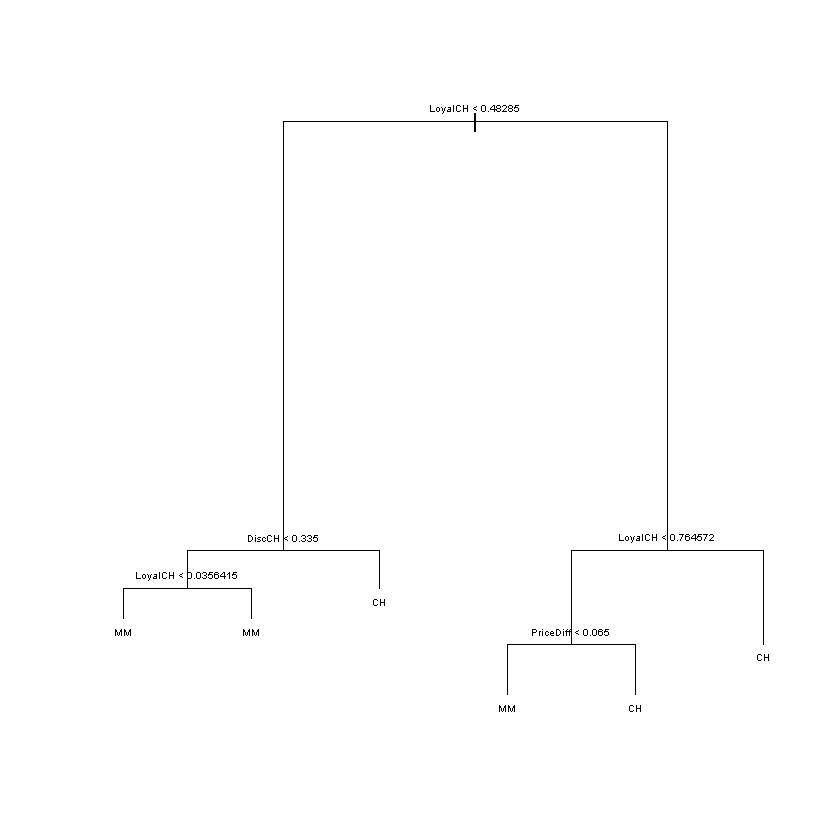

In [27]:
plot(tree.OJ)
text(tree.OJ, cex=.5)

(e) Predict the response on the test data, and produce a confusion
matrix comparing the test labels to the predicted test labels.
What is the test error rate?

In [28]:
tree.pred=predict(tree.OJ, newdata=OJ.test,  type = "class")
cm=table(tree.pred , OJ.test$Purchase)
cm

         
tree.pred  CH  MM
       CH 132  20
       MM  41  77

In [29]:
#Misclassified
(cm[2]+cm[3])/dim(OJ.test)[1]

[1] 0.2259259

(f) Apply the cv.tree() function to the training set in order to
determine the optimal tree size.


In [30]:
cv.OJ=cv.tree(tree.OJ, FUN = prune.misclass)
cv.OJ

$size
[1] 6 5 3 2 1

$dev
[1] 153 153 160 163 320

$k
[1]  -Inf   0.0   4.5   9.0 169.0

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

(g) Produce a plot with tree size on the x-axis and cross-validated
classification error rate on the y-axis.

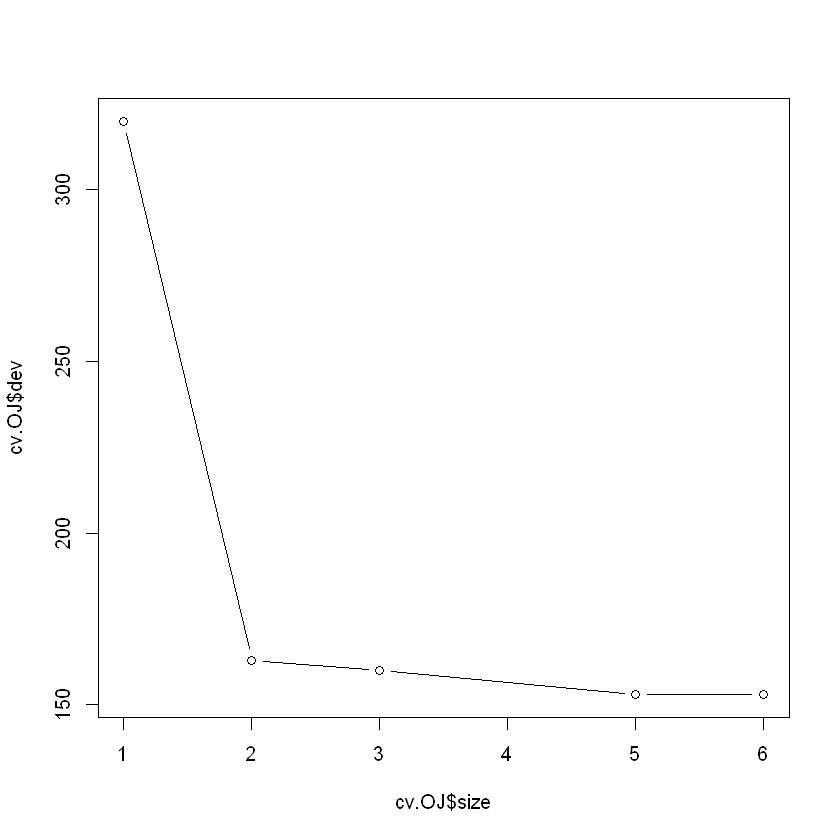

In [31]:
plot(cv.OJ$size ,cv.OJ$dev ,type='b')

(h) Which tree size corresponds to the lowest cross-validated classification error rate?

size 4

(i) Produce a pruned tree corresponding to the optimal tree size
obtained using cross-validation. If cross-validation does not lead
to selection of a pruned tree, then create a pruned tree with five
terminal nodes

In [32]:
prune.OJ=prune.tree(tree.OJ,best=6)
prune.pred=predict(prune.OJ, OJ.test, type='class')
cm=table(prune.pred , OJ.test$Purchase)
cm

          
prune.pred  CH  MM
        CH 132  20
        MM  41  77

In [33]:
#Misclassified
(cm[2]+cm[3])/dim(OJ.test)[1]

[1] 0.2259259

(j) Compare the training error rates between the pruned and unpruned trees. Which is higher?

In [34]:
summary(prune.OJ)


Classification tree:
tree(formula = Purchase ~ ., data = OJ.train)
Variables actually used in tree construction:
[1] "LoyalCH"   "DiscCH"    "PriceDiff"
Number of terminal nodes:  6 
Residual mean deviance:  0.7778 = 617.6 / 794 
Misclassification error rate: 0.1662 = 133 / 800 

In [35]:
summary(tree.OJ)


Classification tree:
tree(formula = Purchase ~ ., data = OJ.train)
Variables actually used in tree construction:
[1] "LoyalCH"   "DiscCH"    "PriceDiff"
Number of terminal nodes:  6 
Residual mean deviance:  0.7778 = 617.6 / 794 
Misclassification error rate: 0.1662 = 133 / 800 

For pruned tree misclassification train error is a bit higher

(k) Compare the test error rates between the pruned and unpruned
trees. Which is higher?

Test error is the same for pruned tree

## Problem 10

In [36]:
head(Hitters)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NA,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


(a) Remove the observations for whom the salary information is
unknown, and then log-transform the salaries.

In [37]:
df_Hitters<-Hitters[!is.na(Hitters$Salary), ]
df_Hitters$Salary <- log(df_Hitters$Salary)

b) Create a training set consisting of the first 200 observations, and
a test set consisting of the remaining observations

In [38]:
train=1:200
df_train <- df_Hitters[train,]
df_test <- df_Hitters[-train,]

(c) Perform boosting on the training set with 1,000 trees for a range
of values of the shrinkage parameter λ. Produce a plot with
different shrinkage values on the x-axis and the corresponding
training set MSE on the y-axis

In [39]:
lambda = c(0.1, 0.05, 0.01, 0.005, 0.001)
error=chose_lambda(df_train, df_train, df_train$Salary,  Salary~., lambda)

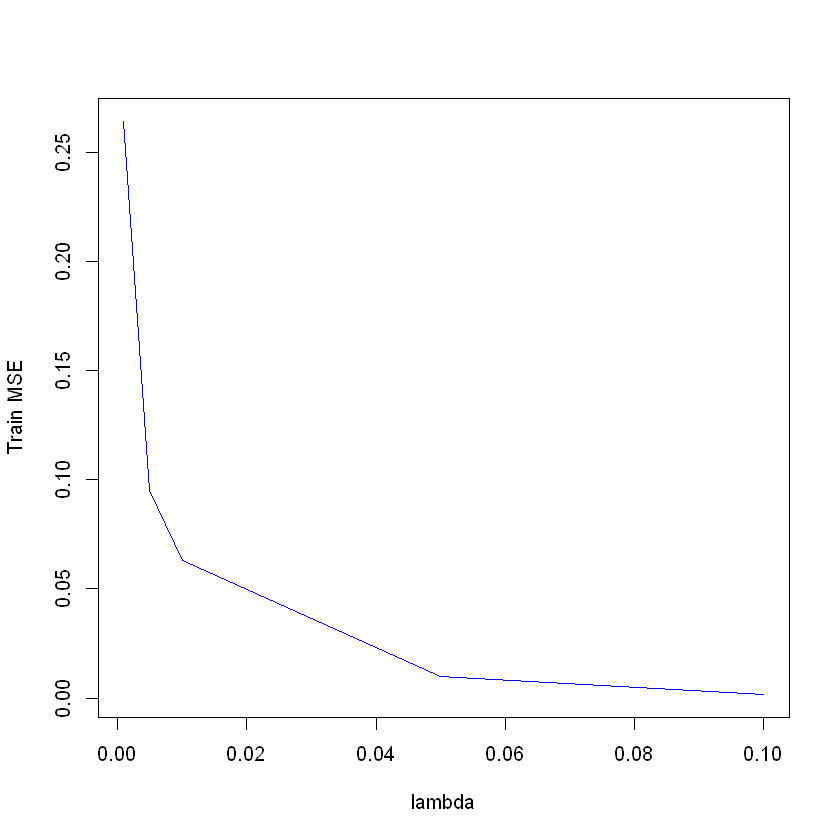

In [40]:
plot(lambda, error, xlab = 'lambda', ylab = 'Train MSE', type = 'l', col="blue")

In [41]:
min(error)
which.min(error)

[1] 0.001537196

[1] 1

(d)Produce a plot with different shrinkage values on the x-axis and the corresponding test set MSE on the y-axis.

In [42]:
error=chose_lambda(df_train, df_test, df_test$Salary,  Salary~., lambda)

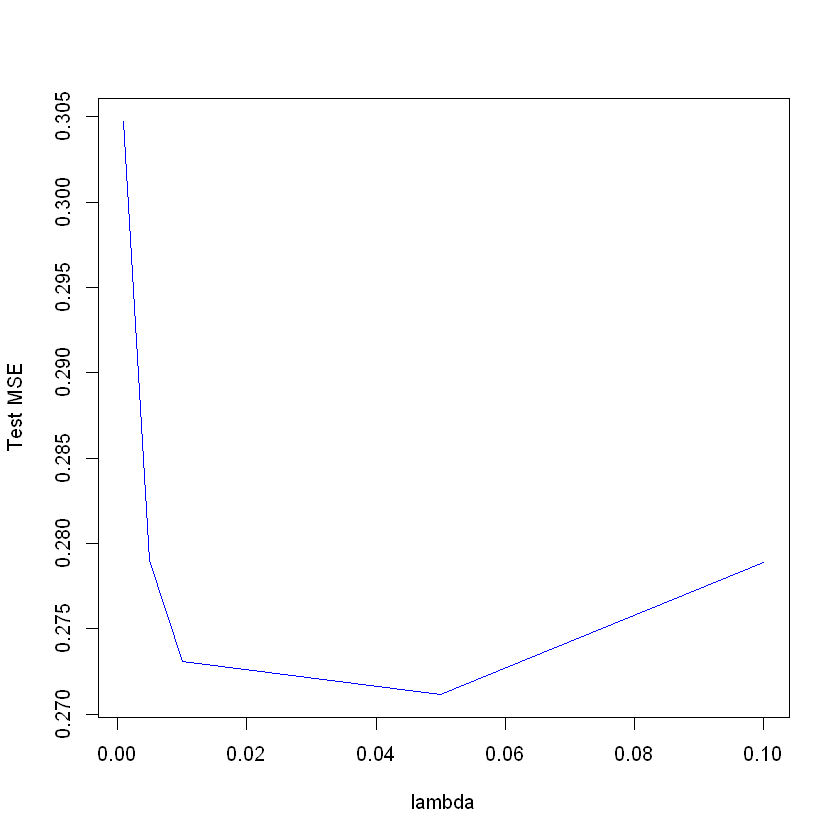

In [43]:
plot(lambda, error, xlab = 'lambda', ylab = 'Test MSE', type = 'l', col="blue")

In [44]:
min(error)
lambda[which.min(error)]

[1] 0.2711458

[1] 0.05

(e) Compare the test MSE of boosting to the test MSE that results
from applying two of the regression approaches seen in
Chapters 3 and 6.

In [45]:
lm.fit = lm(Salary ~ ., data = df_train)
pred1 = predict(lm.fit, df_test)
mean((pred1 - df_test$Salary)^2)

[1] 0.4917959

In [46]:
m = model.matrix(Salary ~ ., data = df_train)
m.test = model.matrix(Salary ~ ., data = df_test)
y = df_train$Salary
lasso.fit = glmnet(m, y, alpha = 1)
lasso_pred = predict(lasso.fit, s = 0.05, newx = m.test)
mean((lasso_pred - df_test$Salary)^2)

[1] 0.4485668

Linear regression and Lasso errors are larger on test than for boosting 

(f) Which variables appear to be the most important predictors in
the boosted model?

,var,rel.inf
CAtBat,CAtBat,19.4813145
CRuns,CRuns,14.1625818
Years,Years,7.0191699
PutOuts,PutOuts,6.7245145
CHmRun,CHmRun,6.5446708
Walks,Walks,6.2767434
CRBI,CRBI,6.0142266
CWalks,CWalks,5.5551684
CHits,CHits,5.0839892
Assists,Assists,4.0343049


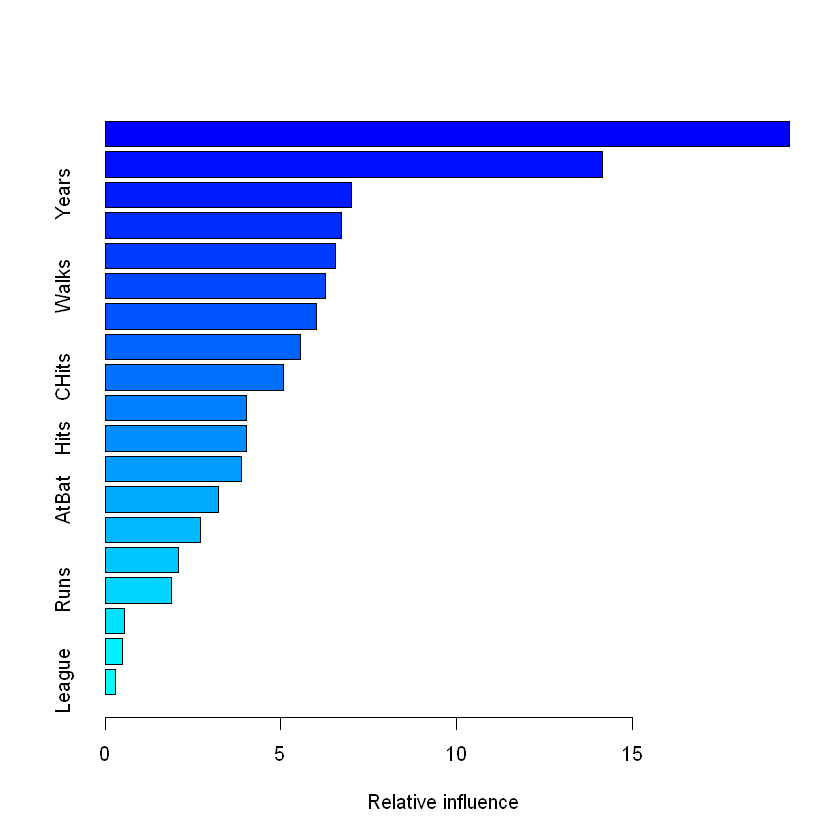

In [47]:
boost.hitters <- gbm(Salary ~ ., data = df_train, distribution = "gaussian", n.trees = 1000, shrinkage = lambda[which.min(error)])
summary(boost.hitters)

CatBat is most impotant feature

(g) Now apply bagging to the training set. What is the test set MSE
for this approach?

In [48]:
set.seed(1)
bag.hitters= randomForest(Salary∼.,data=df_train, mtry=19, importance =TRUE)
bag.hitters


Call:
 randomForest(formula = Salary ~ ., data = df_train, mtry = 19,      importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 19

          Mean of squared residuals: 0.2178554
                    % Var explained: 73.82

In [49]:
pred.hitters = predict(bag.hitters, newdata = df_test)
mean((pred.hitters - df_test$Salary)^2)

[1] 0.2301184

Bagging gives a bit lower error on test and higher on train. Boosting is overfitting more on training.

## Problem 11

In [50]:
head(Caravan)

MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No
23,1,2,1,5,0,5,0,5,0,...,0,0,0,0,0,0,0,0,0,No


(a) Create a training set consisting of the first 1,000 observations,
and a test set consisting of the remaining observations.

In [51]:
train = 1:1000
Caravan$Purchase = ifelse(Caravan$Purchase == "Yes", 1, 0)
caravan.train = Caravan[train,]
caravan.test = Caravan[-train,]

(b) Fit a boosting model to the training set with Purchase as the
response and the other variables as predictors. Use 1,000 trees,
and a shrinkage value of 0.01. Which predictors appear to be
the most important?

Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
"variable 50: PVRAAUT has no variation."Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
"variable 71: AVRAAUT has no variation."

,var,rel.inf
PPERSAUT,PPERSAUT,15.2230473
MKOOPKLA,MKOOPKLA,9.8627481
MOPLHOOG,MOPLHOOG,7.4299508
MBERMIDD,MBERMIDD,5.3293693
MGODGE,MGODGE,4.6340178
PBRAND,PBRAND,4.4095427
ABRAND,ABRAND,4.1578551
MINK3045,MINK3045,3.9464247
MAUT1,MAUT1,2.8691540
PWAPART,PWAPART,2.8346909


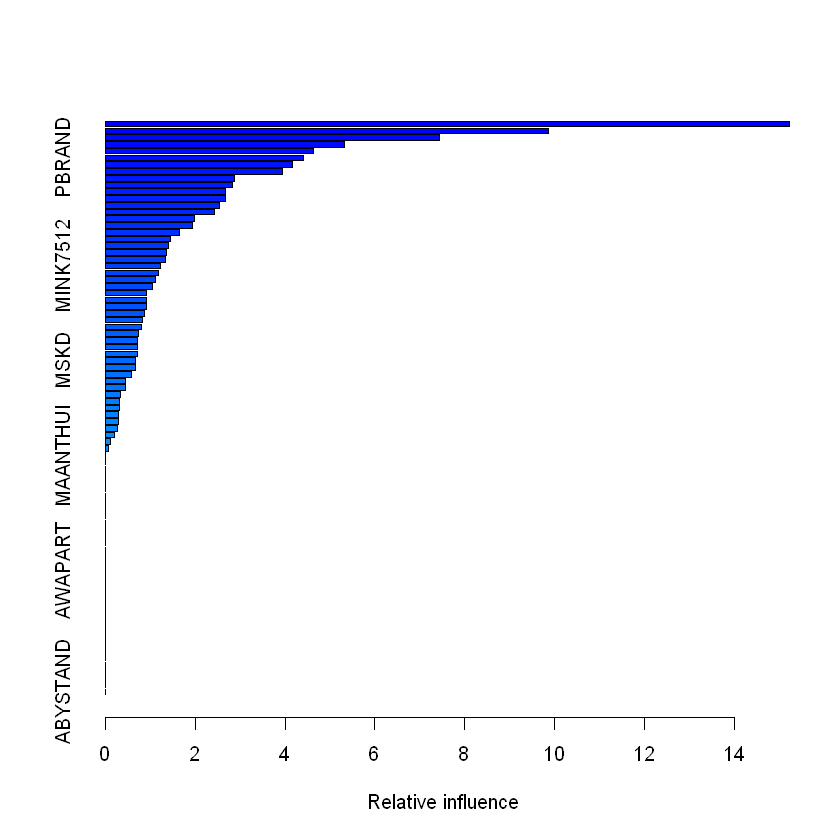

In [52]:
set.seed(4)
boost.caravan = gbm(Purchase ~ ., data = caravan.train, distribution = "bernoulli", n.trees = 1000, shrinkage = 0.01)
summary(boost.caravan)

(c) Use the boosting model to predict the response on the test data.
Predict that a person will make a purchase if the estimated probability of purchase is greater than 20 %. Form a confusion matrix. What fraction of the people predicted to make a purchase
do in fact make one? How does this compare with the results
obtained from applying KNN or logistic regression to this data
set?

In [53]:
pred.prob = predict(boost.caravan, caravan.test, type = "response")
cm=Predictions(pred.prob, caravan.test$Purchase, 0, 1, length(pred.prob), threshold=0.2)
#print(pred.prob)
print(cm)



Using 1000 trees...



      y
y_pred    0    1
     0 4403  254
     1  130   35


In [54]:
true_pos(cm)

[1] 0.1324955

In [55]:
set.seed(1)
glm.fit = glm(Purchase~., data = caravan.train, family=binomial)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

In [56]:
pred.prob = predict(glm.fit, caravan.test, type = "response")
cm=Predictions(pred.prob, caravan.test$Purchase, 0, 1, length(pred.prob), threshold=0.2)
#print(pred.prob)
print(cm)


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

      y
y_pred    0    1
     0 4183  231
     1  350   58


In [57]:
true_pos(cm)

[1] 0.2405042

Logistic regression worked out better

## Problem 12

12. Apply boosting, bagging, and random forests to a data set of your
choice. Be sure to fit the models on a training set and to evaluate their
performance on a test set. How accurate are the results compared
to simple methods like linear or logistic regression? Which of these
approaches yields the best performance?

In [58]:
head(Wage)

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.04315
86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.47602
161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.98218
155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.68529
11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.04315
376662,2008,54,2. Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.845098,127.11574


In [59]:
dim(Wage)

[1] 3000   11

In [60]:
train <- sample(dim(Wage)[1], 2000)
df_tr<-Wage[train,]
df_test<-Wage[-train,]

Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
"variable 6: region has no variation."

,var,rel.inf
education,education,56.0027290
health_ins,health_ins,17.9760663
age,age,10.8178319
maritl,maritl,10.3728255
year,year,1.8414392
health,health,1.6583514
race,race,0.8772838
jobclass,jobclass,0.4534731
region,region,0.0000000


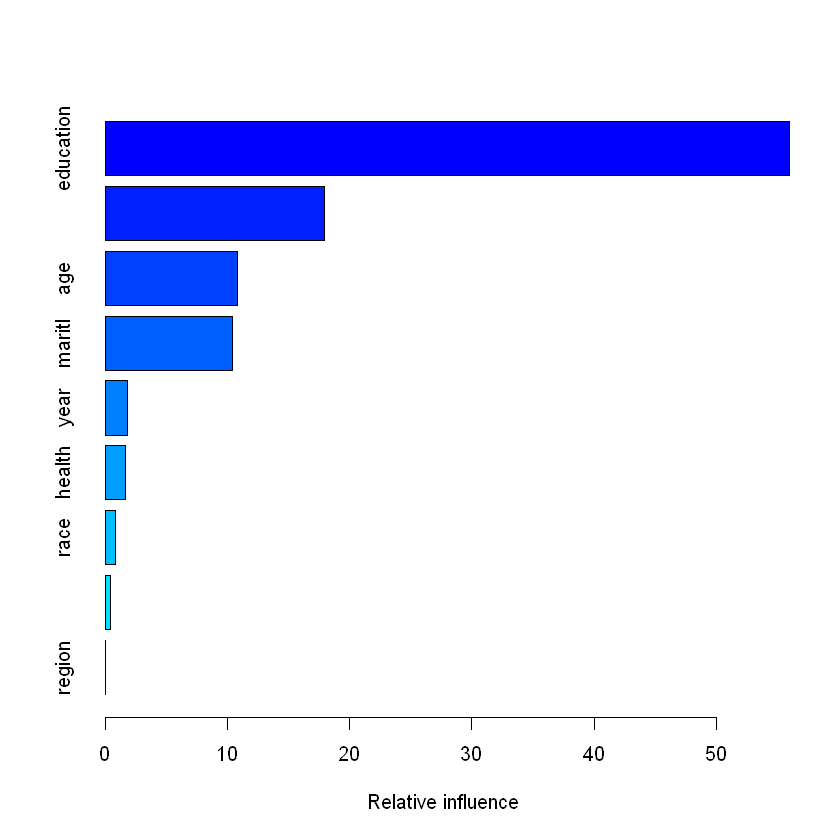

In [61]:
boost.wage <- gbm(wage ~ .-logwage, data = df_tr, distribution = "gaussian", n.trees = 1000, shrinkage = 0.01)
summary(boost.wage)

Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
"variable 6: region has no variation."Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
"variable 6: region has no variation."Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
"variable 6: region has no variation."Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
"variable 6: region has no variation."

[1] 1.389058 1.172183 1.574058 2.273878


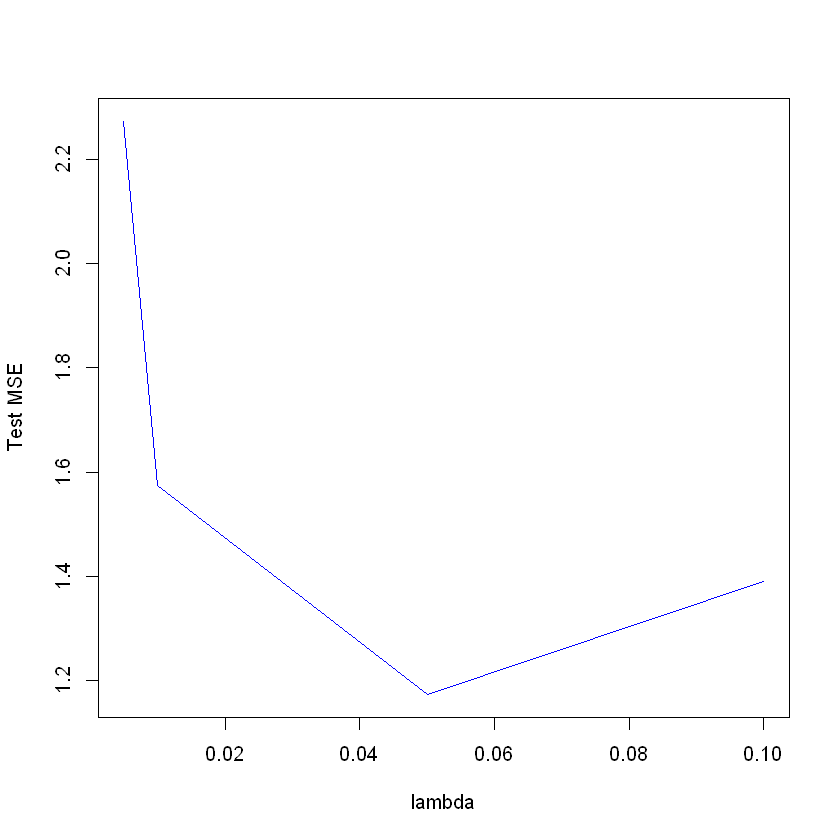

In [64]:
lambda = c(0.1, 0.05, 0.01, 0.005)
error=chose_lambda(df_tr, df_test, df_test$wage,  wage~., lambda)
print(error)
plot(lambda, error, xlab = 'lambda', ylab = 'Test MSE', type = 'l', col="blue")

In [63]:
min(error)
which.min(error)

[1] 1.172183

[1] 2